<a href="https://colab.research.google.com/github/MaryamSyed/real-estate-tycoon/blob/master/Real_Estate_Tycoon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

import pickle

import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.simplefilter(action='ignore', category=ConvergenceWarning)

pd.set_option('display.max_columns', 100)

file_name = "https://raw.githubusercontent.com/maryamsyed/real-estate-tycoon/master/real_estate_data[1].csv"
df=pd.read_csv(file_name)

Exploratory Data Analysis

In [0]:
df.head()

,tx_price,beds,baths,sqft,year_built,lot_size,property_type,exterior_walls,roof,basement,restaurants,groceries,nightlife,cafes,shopping,arts_entertainment,beauty_spas,active_life,median_age,married,college_grad,property_tax,insurance,median_school,num_schools,tx_year
0,295850,1,1,584,2013,0,Apartment / Condo / Townhouse,Wood Siding,NaN,NaN,107,9,30,19,89,6,47,58,33.0,65.0,84.0,234.0,81.0,9.0,3.0,2013
1,216500,1,1,612,1965,0,Apartment / Condo / Townhouse,Brick,Composition Shingle,1.0,105,15,6,13,87,2,26,14,39.0,73.0,69.0,169.0,51.0,3.0,3.0,2006
2,279900,1,1,615,1963,0,Apartment / Condo / Townhouse,Wood Siding,NaN,NaN,183,13,31,30,101,10,74,62,28.0,15.0,86.0,216.0,74.0,8.0,3.0,2012
3,379900,1,1,618,2000,33541,Apartment / Condo / Townhouse,Wood Siding,NaN,NaN,198,9,38,25,127,11,72,83,36.0,25.0,91.0,265.0,92.0,9.0,3.0,2005
4,340000,1,1,634,1992,0,Apartment / Condo / Townhouse,Brick,NaN,NaN,149,7,22,20,83,10,50,73,37.0,20.0,75.0,88.0,30.0,9.0,3.0,2002


In [0]:
df.shape

(1883, 26)

In [0]:
df.dtypes

tx_price                int64
beds                    int64
baths                   int64
sqft                    int64
year_built              int64
lot_size                int64
property_type          object
exterior_walls         object
roof                   object
basement              float64
restaurants             int64
groceries               int64
nightlife               int64
cafes                   int64
shopping                int64
arts_entertainment      int64
beauty_spas             int64
active_life             int64
median_age            float64
married               float64
college_grad          float64
property_tax          float64
insurance             float64
median_school         float64
num_schools           float64
tx_year                 int64
dtype: object

In [0]:
df.describe()

,tx_price,beds,baths,sqft,year_built,lot_size,basement,restaurants,groceries,nightlife,cafes,shopping,arts_entertainment,beauty_spas,active_life,median_age,married,college_grad,property_tax,insurance,median_school,num_schools,tx_year
count,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1.883000e+03,1657.0,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000
mean,422839.807754,3.420605,2.579926,2329.398832,1982.963887,1.339262e+04,1.0,40.210303,4.505045,5.074881,5.325013,40.802443,3.394052,23.416888,15.835369,38.601168,69.091875,65.085502,466.777483,140.454063,6.502921,2.793415,2007.111524
std,151462.593276,1.068554,0.945576,1336.991858,20.295945,4.494930e+04,0.0,46.867012,4.491029,8.464668,7.539309,53.539296,4.699787,25.776916,17.667717,6.634110,19.659767,16.953165,231.656645,72.929765,1.996109,0.505358,5.196898
min,200000.000000,1.000000,1.000000,500.000000,1880.000000,0.000000e+00,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,11.000000,5.000000,88.000000,30.000000,1.000000,1.000000,1993.000000
25%,300000.000000,3.000000,2.000000,1345.000000,1970.000000,1.542000e+03,1.0,7.000000,1.000000,0.000000,0.000000,6.000000,0.000000,4.000000,4.000000,33.000000,58.000000,54.000000,320.000000,94.000000,5.000000,3.000000,2004.000000
50%,392000.000000,3.000000,3.000000,1907.000000,1986.000000,6.098000e+03,1.0,23.000000,3.000000,2.000000,3.000000,22.000000,2.000000,15.000000,10.000000,38.000000,73.000000,66.000000,426.000000,125.000000,7.000000,3.000000,2007.000000
75%,525000.000000,4.000000,3.000000,3005.000000,2000.000000,1.176100e+04,1.0,58.000000,7.000000,6.000000,6.000000,51.000000,5.000000,35.000000,21.000000,43.000000,84.000000,78.000000,569.000000,169.000000,8.000000,3.000000,2011.000000
max,800000.000000,5.000000,6.000000,8450.000000,2015.000000,1.220551e+06,1.0,266.000000,24.000000,54.000000,47.000000,340.000000,35.000000,177.000000,94.000000,69.000000,100.000000,100.000000,4508.000000,1374.000000,10.000000,4.000000,2016.000000


In [0]:
df.describe(include=['object'])

,property_type,exterior_walls,roof
count,1883,1660,1529
unique,2,16,16
top,Single-Family,Brick,Composition Shingle
freq,1080,687,1179


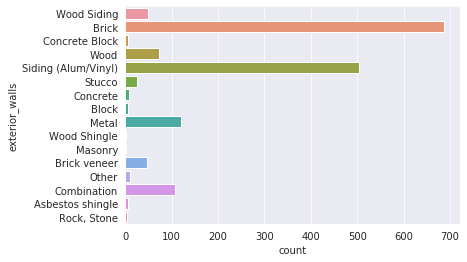

In [0]:
sns.countplot(y='exterior_walls', data=df)
plt.show()

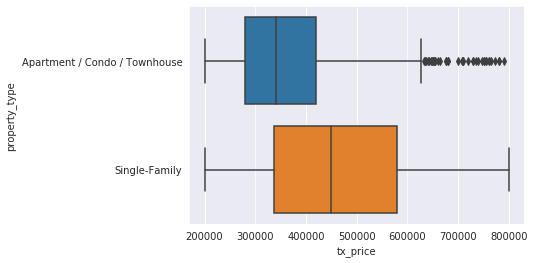

In [0]:
sns.boxplot(y='property_type', x='tx_price', data=df)

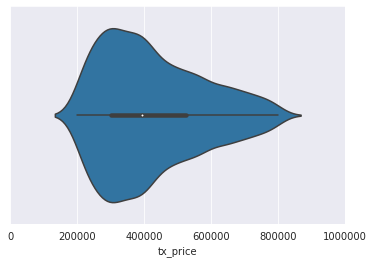

In [0]:
sns.violinplot('tx_price', data=df)
plt.xlim(0, 1000000)
plt.show()

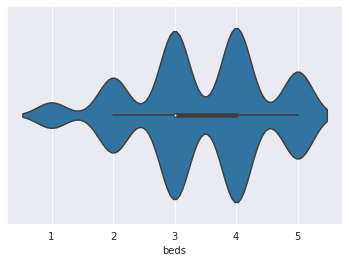

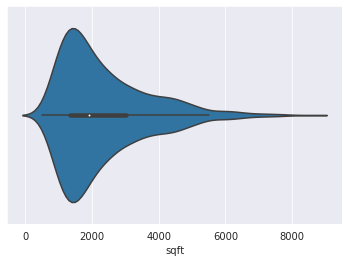

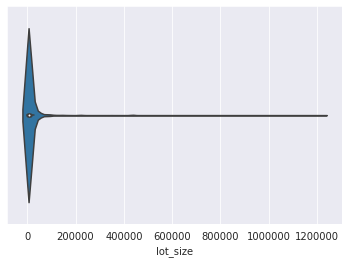

In [0]:

sns.violinplot(df.beds)
plt.show()

sns.violinplot(df.sqft)
plt.show()

sns.violinplot(df.lot_size)
plt.show()

In [0]:
df.groupby('property_type').mean()

,tx_price,beds,baths,sqft,year_built,lot_size,basement,restaurants,groceries,nightlife,cafes,shopping,arts_entertainment,beauty_spas,active_life,median_age,married,college_grad,property_tax,insurance,median_school,num_schools,tx_year
property_type,,,,,,,,,,,,,,,,,,,,,,,
Apartment / Condo / Townhouse,366614.034869,2.601494,2.200498,1513.727273,1988.936488,3944.239103,1.0,58.418431,5.919054,7.855542,8.037360,57.631382,4.840598,32.087173,22.410959,37.199253,57.534247,66.372354,346.261519,105.652553,6.382316,2.831880,2007.941469
Single-Family,464644.711111,4.029630,2.862037,2935.865741,1978.523148,20417.666667,1.0,26.672222,3.453704,3.007407,3.308333,28.289815,2.318519,16.970370,10.946296,39.643519,77.685185,64.128704,556.383333,166.329630,6.592593,2.764815,2006.494444


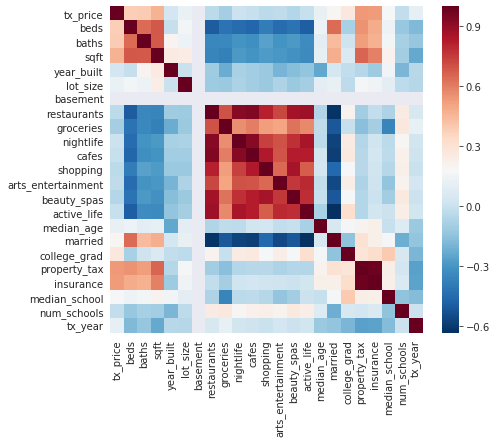

In [0]:
correlations = df.corr()
plt.figure(figsize=(7,6))
sns.heatmap(correlations,cmap='RdBu_r')

Data Cleaning

In [0]:
df = df.drop_duplicates()
df.shape

(1883, 26)

In [0]:
df['basement'].unique()

array([nan,  1.])

In [0]:
df['basement'].fillna(0,inplace=True)

In [0]:
df['basement'].unique()

array([0., 1.])

In [0]:
df['roof'].unique()

array([nan, 'Composition Shingle', 'Other', 'Gravel/Rock',
       'Roll Composition', 'Asphalt', 'Slate', 'asphalt', 'Shake Shingle',
       'Built-up', 'Asbestos', 'Metal', 'shake-shingle',
       'Wood Shake/ Shingles', 'Composition', 'composition',
       'asphalt,shake-shingle'], dtype=object)

In [0]:
df['roof'].replace('composition', 'Composition', inplace=True)
df['roof'].replace('asphalt', 'Asphalt', inplace=True)
df['roof'].replace(['shake-shingle', 'asphalt,shake-shingle'], 'Shake Shingle',
                inplace=True)

In [0]:
df['roof'].unique()

array([nan, 'Composition Shingle', 'Other', 'Gravel/Rock',
       'Roll Composition', 'Asphalt', 'Slate', 'Shake Shingle',
       'Built-up', 'Asbestos', 'Metal', 'Wood Shake/ Shingles',
       'Composition'], dtype=object)

In [0]:
df['exterior_walls'].unique()

array(['Wood Siding', 'Brick', 'Concrete Block', 'Wood',
       'Siding (Alum/Vinyl)', 'Stucco', 'Concrete', 'Block', nan, 'Metal',
       'Wood Shingle', 'Masonry', 'Brick veneer', 'Other', 'Combination',
       'Asbestos shingle', 'Rock, Stone'], dtype=object)

In [0]:
df['exterior_walls'].replace('Rock,Stone', 'Masonry', inplace=True)
df['exterior_walls'].replace(['Block', 'Concrete Block'], 'Concrete',inplace=True)

In [0]:
df['exterior_walls'].unique()

array(['Wood Siding', 'Brick', 'Concrete', 'Wood', 'Siding (Alum/Vinyl)',
       'Stucco', nan, 'Metal', 'Wood Shingle', 'Masonry', 'Brick veneer',
       'Other', 'Combination', 'Asbestos shingle', 'Rock, Stone'],
      dtype=object)

In [0]:
df.select_dtypes(include=['object']).isnull().sum()

property_type       0
exterior_walls    223
roof              354
dtype: int64

In [0]:
for column in df.select_dtypes(include=['object']):
    df[column].fillna('Missing', inplace=True)

In [0]:
df.select_dtypes(include=['object']).isnull().sum()

property_type     0
exterior_walls    0
roof              0
dtype: int64

In [0]:
df.select_dtypes(exclude=['object']).isnull().sum()

tx_price              0
beds                  0
baths                 0
sqft                  0
year_built            0
lot_size              0
basement              0
restaurants           0
groceries             0
nightlife             0
cafes                 0
shopping              0
arts_entertainment    0
beauty_spas           0
active_life           0
median_age            0
married               0
college_grad          0
property_tax          0
insurance             0
median_school         0
num_schools           0
tx_year               0
dtype: int64

In [0]:
df.to_csv('cleaned_df.csv', index=None)

Feature Engineering

In [0]:
file_name = "https://raw.githubusercontent.com/maryamsyed/real-estate-tycoon/master/cleaned_df[1].csv"
df=pd.read_csv(file_name)
df.head()

,tx_price,beds,baths,sqft,year_built,lot_size,property_type,exterior_walls,roof,basement,restaurants,groceries,nightlife,cafes,shopping,arts_entertainment,beauty_spas,active_life,median_age,married,college_grad,property_tax,insurance,median_school,num_schools,tx_year
0,295850,1,1,584,2013,0,Apartment / Condo / Townhouse,Wood Siding,Missing,0.0,107,9,30,19,89,6,47,58,33.0,65.0,84.0,234.0,81.0,9.0,3.0,2013
1,216500,1,1,612,1965,0,Apartment / Condo / Townhouse,Brick,Composition Shingle,1.0,105,15,6,13,87,2,26,14,39.0,73.0,69.0,169.0,51.0,3.0,3.0,2006
2,279900,1,1,615,1963,0,Apartment / Condo / Townhouse,Wood Siding,Missing,0.0,183,13,31,30,101,10,74,62,28.0,15.0,86.0,216.0,74.0,8.0,3.0,2012
3,379900,1,1,618,2000,33541,Apartment / Condo / Townhouse,Wood Siding,Missing,0.0,198,9,38,25,127,11,72,83,36.0,25.0,91.0,265.0,92.0,9.0,3.0,2005
4,340000,1,1,634,1992,0,Apartment / Condo / Townhouse,Brick,Missing,0.0,149,7,22,20,83,10,50,73,37.0,20.0,75.0,88.0,30.0,9.0,3.0,2002


In [0]:
#Creating indicator variable for 2 beds and 2 baths properties

df['two_and_two'] = ((df['beds']==2) & (df.baths == 2)).astype(int)

#Creating property age feature

df['property_age'] = df['tx_year'] - df['year_built']

# Group 'Wood Siding' and 'Wood Shingle' with 'Wood'
df['exterior_walls'].replace(['Wood Siding', 'Wood Shingle'], 'Wood', inplace=True)

# List of classes to group
other_exterior_walls = ['Concrete Block', 'Stucco', 'Masonry', 'Other', 'Asbestos shingle']

# Group other classes into 'Other'
df['exterior_walls'].replace(other_exterior_walls, 'Other', inplace=True)

# Create indicator feature for transactions between 2010 and 2013, inclusive
df['during_recession'] = ((df.tx_year >= 2010) & (df.tx_year <= 2013)).astype(int)

# Create a school score feature that num_schools * median_school
df['school_score'] = df.num_schools * df.median_school

# Group 'Composition' and 'Wood Shake/ Shingles' into 'Composition Shingle'
df.roof.replace(['Composition', 'Wood Shake/ Shingles'],
                'Composition Shingle', inplace=True)

# List of classes to group
other_roofs = ['Other', 'Gravel/Rock', 'Roll Composition', 'Slate', 'Built-up', 'Asbestos', 'Metal']

# Group other classes into 'Other'
df.roof.replace(other_roofs, 'Other', inplace=True)

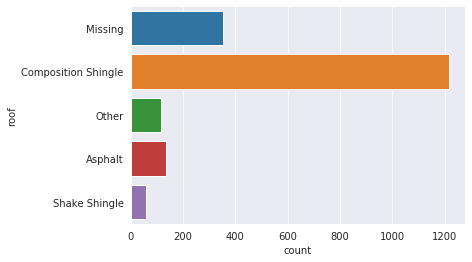

In [0]:
sns.countplot(y='roof', data=df)
plt.show()

In [0]:
pd.get_dummies( df, columns=['roof'] ).head()

,tx_price,beds,baths,sqft,year_built,lot_size,property_type,exterior_walls,basement,restaurants,groceries,nightlife,cafes,shopping,arts_entertainment,beauty_spas,active_life,median_age,married,college_grad,property_tax,insurance,median_school,num_schools,tx_year,two_and_two,property_age,during_recession,school_score,roof_Asphalt,roof_Composition Shingle,roof_Missing,roof_Other,roof_Shake Shingle
0,295850,1,1,584,2013,0,Apartment / Condo / Townhouse,Wood,0.0,107,9,30,19,89,6,47,58,33.0,65.0,84.0,234.0,81.0,9.0,3.0,2013,0,0,1,27.0,0,0,1,0,0
1,216500,1,1,612,1965,0,Apartment / Condo / Townhouse,Brick,1.0,105,15,6,13,87,2,26,14,39.0,73.0,69.0,169.0,51.0,3.0,3.0,2006,0,41,0,9.0,0,1,0,0,0
2,279900,1,1,615,1963,0,Apartment / Condo / Townhouse,Wood,0.0,183,13,31,30,101,10,74,62,28.0,15.0,86.0,216.0,74.0,8.0,3.0,2012,0,49,1,24.0,0,0,1,0,0
3,379900,1,1,618,2000,33541,Apartment / Condo / Townhouse,Wood,0.0,198,9,38,25,127,11,72,83,36.0,25.0,91.0,265.0,92.0,9.0,3.0,2005,0,5,0,27.0,0,0,1,0,0
4,340000,1,1,634,1992,0,Apartment / Condo / Townhouse,Brick,0.0,149,7,22,20,83,10,50,73,37.0,20.0,75.0,88.0,30.0,9.0,3.0,2002,0,10,0,27.0,0,0,1,0,0


In [0]:
abt = pd.get_dummies(df, columns=['exterior_walls', 'roof', 'property_type'])

In [0]:
print( len(abt.columns) )

42


In [0]:
abt.drop(['tx_year', 'year_built'], axis=1, inplace=True)

In [0]:
abt.to_csv('analytical_base_table.csv', index=None)

In [0]:
file_name = "https://raw.githubusercontent.com/maryamsyed/real-estate-tycoon/master/analytical_base_table[1].csv"
df=pd.read_csv(file_name)
df.head()

,tx_price,beds,baths,sqft,lot_size,basement,restaurants,groceries,nightlife,cafes,shopping,arts_entertainment,beauty_spas,active_life,median_age,married,college_grad,property_tax,insurance,median_school,num_schools,two_and_two,property_age,during_recession,school_score,exterior_walls_Brick,exterior_walls_Brick veneer,exterior_walls_Combination,exterior_walls_Metal,exterior_walls_Missing,exterior_walls_Other,exterior_walls_Siding (Alum/Vinyl),exterior_walls_Wood,roof_Asphalt,roof_Composition Shingle,roof_Missing,roof_Other,roof_Shake Shingle,property_type_Apartment / Condo / Townhouse,property_type_Single-Family
0,295850,1,1,584,0,0.0,107,9,30,19,89,6,47,58,33.0,65.0,84.0,234.0,81.0,9.0,3.0,0,0,1,27.0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0
1,216500,1,1,612,0,1.0,105,15,6,13,87,2,26,14,39.0,73.0,69.0,169.0,51.0,3.0,3.0,0,41,0,9.0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,279900,1,1,615,0,0.0,183,13,31,30,101,10,74,62,28.0,15.0,86.0,216.0,74.0,8.0,3.0,0,49,1,24.0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0
3,379900,1,1,618,33541,0.0,198,9,38,25,127,11,72,83,36.0,25.0,91.0,265.0,92.0,9.0,3.0,0,5,0,27.0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0
4,340000,1,1,634,0,0.0,149,7,22,20,83,10,50,73,37.0,20.0,75.0,88.0,30.0,9.0,3.0,0,10,0,27.0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0


In [0]:
df.shape

(1863, 40)

In [0]:
y = df.tx_price

X=df.drop('tx_price', axis=1)

In [0]:
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1234)

In [0]:
print( len(X_train), len(X_test), len(y_train), len(y_test) )

1490 373 1490 373


In [0]:
X_train.describe()

,beds,baths,sqft,lot_size,basement,restaurants,groceries,nightlife,cafes,shopping,arts_entertainment,beauty_spas,active_life,median_age,married,college_grad,property_tax,insurance,median_school,num_schools,two_and_two,property_age,during_recession,school_score,exterior_walls_Brick,exterior_walls_Brick veneer,exterior_walls_Combination,exterior_walls_Metal,exterior_walls_Missing,exterior_walls_Other,exterior_walls_Siding (Alum/Vinyl),exterior_walls_Wood,roof_Asphalt,roof_Composition Shingle,roof_Missing,roof_Other,roof_Shake Shingle,property_type_Apartment / Condo / Townhouse,property_type_Single-Family
count,1490.000000,1490.000000,1490.000000,1490.000000,1490.000000,1490.000000,1490.000000,1490.000000,1490.000000,1490.000000,1490.000000,1490.000000,1490.000000,1490.000000,1490.000000,1490.000000,1490.000000,1490.000000,1490.000000,1490.000000,1490.000000,1490.000000,1490.000000,1490.000000,1490.000000,1490.000000,1490.000000,1490.000000,1490.000000,1490.000000,1490.000000,1490.000000,1490.000000,1490.000000,1490.000000,1490.000000,1490.000000,1490.000000,1490.000000
mean,3.434228,2.579195,2322.785235,12746.659732,0.878523,39.495973,4.388591,5.004698,5.185906,39.561074,3.361745,22.909396,15.770470,38.508725,69.471141,65.012752,464.265772,139.610067,6.510067,2.779195,0.092617,24.343624,0.265772,17.940268,0.359732,0.024161,0.059060,0.065772,0.119463,0.037584,0.268456,0.065772,0.073154,0.643624,0.189262,0.060403,0.033557,0.419463,0.580537
std,1.072914,0.930476,1297.101677,34805.545024,0.326790,46.985862,4.498340,8.441995,7.442707,52.334853,4.693709,25.724463,17.999282,6.615223,19.865080,17.092542,227.249819,71.510905,1.975224,0.517235,0.289993,21.209025,0.441892,6.452059,0.480083,0.153601,0.235817,0.247966,0.324442,0.190252,0.443305,0.247966,0.260477,0.479089,0.391848,0.238311,0.180146,0.493637,0.493637
min,1.000000,1.000000,500.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,11.000000,5.000000,88.000000,30.000000,1.000000,1.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,2.000000,1351.000000,1542.000000,1.000000,6.000000,1.000000,0.000000,0.000000,6.000000,0.000000,4.000000,4.000000,33.000000,59.000000,53.250000,321.000000,94.000000,5.000000,3.000000,0.000000,6.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.000000,3.000000,1913.500000,6183.000000,1.000000,21.000000,3.000000,2.000000,3.000000,20.000000,2.000000,15.000000,10.000000,38.000000,74.000000,66.000000,426.000000,125.000000,7.000000,3.000000,0.000000,20.000000,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,4.000000,3.000000,3014.750000,11761.000000,1.000000,56.000000,7.000000,6.000000,6.000000,50.000000,5.000000,35.000000,21.000000,43.000000,84.000000,78.000000,572.000000,169.000000,8.000000,3.000000,0.000000,38.000000,1.000000,24.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,5.000000,6.000000,7842.000000,436471.000000,1.000000,266.000000,24.000000,53.000000,47.000000,340.000000,35.000000,177.000000,94.000000,69.000000,100.000000,100.000000,4508.000000,1374.000000,10.000000,4.000000,1.000000,114.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [0]:
 X_train.mean()
 X_train.std()
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1490 entries, 1689 to 815
Data columns (total 39 columns):
beds                                           1490 non-null int64
baths                                          1490 non-null int64
sqft                                           1490 non-null int64
lot_size                                       1490 non-null int64
basement                                       1490 non-null float64
restaurants                                    1490 non-null int64
groceries                                      1490 non-null int64
nightlife                                      1490 non-null int64
cafes                                          1490 non-null int64
shopping                                       1490 non-null int64
arts_entertainment                             1490 non-null int64
beauty_spas                                    1490 non-null int64
active_life                                    1490 non-null int64
median_age        

In [0]:
#Standardizing X_train
X_train_new = (X_train - X_train.mean()) / X_train.std()
X_train_new.describe()

,beds,baths,sqft,lot_size,basement,restaurants,groceries,nightlife,cafes,shopping,arts_entertainment,beauty_spas,active_life,median_age,married,college_grad,property_tax,insurance,median_school,num_schools,two_and_two,property_age,during_recession,school_score,exterior_walls_Brick,exterior_walls_Brick veneer,exterior_walls_Combination,exterior_walls_Metal,exterior_walls_Missing,exterior_walls_Other,exterior_walls_Siding (Alum/Vinyl),exterior_walls_Wood,roof_Asphalt,roof_Composition Shingle,roof_Missing,roof_Other,roof_Shake Shingle,property_type_Apartment / Condo / Townhouse,property_type_Single-Family
count,1.490000e+03,1.490000e+03,1.490000e+03,1.490000e+03,1.490000e+03,1.490000e+03,1.490000e+03,1.490000e+03,1.490000e+03,1.490000e+03,1.490000e+03,1.490000e+03,1.490000e+03,1.490000e+03,1.490000e+03,1.490000e+03,1.490000e+03,1.490000e+03,1.490000e+03,1.490000e+03,1.490000e+03,1.490000e+03,1.490000e+03,1.490000e+03,1.490000e+03,1.490000e+03,1.490000e+03,1.490000e+03,1.490000e+03,1.490000e+03,1.490000e+03,1.490000e+03,1.490000e+03,1.490000e+03,1.490000e+03,1.490000e+03,1.490000e+03,1.490000e+03,1.490000e+03
mean,-1.902281e-16,-4.254613e-17,7.663519e-17,3.911860e-17,9.746119e-17,1.409760e-16,1.621373e-16,2.827995e-16,8.946050e-18,2.315448e-17,-2.132895e-16,1.022299e-16,2.151243e-16,-3.534831e-16,-1.768906e-16,-5.603273e-17,8.032352e-17,-1.070732e-16,1.852359e-16,9.239440e-18,-1.969342e-16,-3.012132e-17,-7.004092e-18,-2.877266e-16,1.457447e-16,1.207088e-17,4.798548e-17,1.039437e-16,2.615358e-17,1.184362e-16,1.359092e-16,-2.747988e-16,-8.278240e-17,-2.752459e-16,2.772577e-16,-2.613867e-16,7.708226e-17,8.941393e-17,-8.941393e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.268801e+00,-1.697190e+00,-1.405276e+00,-3.662250e-01,-2.688343e+00,-8.405927e-01,-9.756023e-01,-5.928336e-01,-6.967768e-01,-7.559221e-01,-7.162235e-01,-8.905685e-01,-8.761722e-01,-2.495566e+00,-2.943413e+00,-3.511049e+00,-1.655736e+00,-1.532774e+00,-2.789591e+00,-3.439819e+00,-3.193783e-01,-1.147796e+00,-6.014412e-01,-2.315581e+00,-7.493115e-01,-1.572980e-01,-2.504503e-01,-2.652453e-01,-3.682115e-01,-1.975485e-01,-6.055792e-01,-2.652453e-01,-2.808475e-01,-1.343434e+00,-4.829980e-01,-2.534612e-01,-1.862765e-01,-8.497402e-01,-1.176040e+00
25%,-4.047185e-01,-6.224713e-01,-7.491974e-01,-3.219217e-01,3.717266e-01,-7.128947e-01,-7.532980e-01,-5.928336e-01,-6.967768e-01,-6.412758e-01,-7.162235e-01,-7.350745e-01,-6.539411e-01,-8.327346e-01,-5.271130e-01,-6.881804e-01,-6.304329e-01,-6.378058e-01,-7.645042e-01,4.268957e-01,-3.193783e-01,-8.648971e-01,-6.014412e-01,-9.206779e-01,-7.493115e-01,-1.572980e-01,-2.504503e-01,-2.652453e-01,-3.682115e-01,-1.975485e-01,-6.055792e-01,-2.652453e-01,-2.808475e-01,-1.343434e+00,-4.829980e-01,-2.534612e-01,-1.862765e-01,-8.497402e-01,-1.176040e+00
50%,5.273226e-01,4.522474e-01,-3.155383e-01,-1.885809e-01,3.717266e-01,-3.936498e-01,-3.086896e-01,-3.559228e-01,-2.936977e-01,-3.737676e-01,-2.901213e-01,-3.074659e-01,-3.205944e-01,-7.690215e-02,2.279809e-01,5.775901e-02,-1.683864e-01,-2.043054e-01,2.480391e-01,4.268957e-01,-3.193783e-01,-2.048007e-01,-6.014412e-01,9.257749e-03,-7.493115e-01,-1.572980e-01,-2.504503e-01,-2.652453e-01,-3.682115e-01,-1.975485e-01,-6.055792e-01,-2.652453e-01,-2.808475e-01,7.438617e-01,-4.829980e-01,-2.534612e-01,-1.862765e-01,-8.497402e-01,8.497402e-01
75%,5.273226e-01,4.522474e-01,5.334699e-01,-2.831904e-02,3.717266e-01,3.512552e-01,5.805274e-01,1.178989e-01,1.093814e-01,1.994641e-01,3.490321e-01,4.700041e-01,2.905410e-01,6.789303e-01,7.313768e-01,

In [0]:
#Standardizing test dataset
X_test_new = (X_test - X_train.mean()) / X_train.std()
X_test_new.describe()

,beds,baths,sqft,lot_size,basement,restaurants,groceries,nightlife,cafes,shopping,arts_entertainment,beauty_spas,active_life,median_age,married,college_grad,property_tax,insurance,median_school,num_schools,two_and_two,property_age,during_recession,school_score,exterior_walls_Brick,exterior_walls_Brick veneer,exterior_walls_Combination,exterior_walls_Metal,exterior_walls_Missing,exterior_walls_Other,exterior_walls_Siding (Alum/Vinyl),exterior_walls_Wood,roof_Asphalt,roof_Composition Shingle,roof_Missing,roof_Other,roof_Shake Shingle,property_type_Apartment / Condo / Townhouse,property_type_Single-Family
count,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000
mean,-0.117360,-0.080790,-0.090918,-0.032233,0.010753,0.091066,0.141283,0.056925,0.109381,0.132152,0.048019,0.107741,0.034946,0.072238,-0.100643,0.010077,-0.063649,-0.055431,-0.036315,0.121083,0.050419,0.012619,-0.025074,0.032942,0.066008,0.052152,-0.045811,-0.027385,-0.004625,-0.042540,-0.025002,-0.005761,-0.002950,0.010790,-0.004068,0.027785,-0.052337,0.111555,-0.111555
std,0.958651,0.989343,1.001612,1.034313,0.988393,1.003586,0.996496,1.034407,1.077763,1.121003,1.013148,1.018536,0.922012,1.020545,0.949393,0.944916,0.889783,0.908482,1.042742,0.894708,1.068412,0.972418,0.987285,1.011310,1.017999,1.150338,0.910017,0.951364,0.995547,0.890424,0.987522,0.990833,0.996149,0.997703,0.997762,1.050725,0.852944,1.012934,1.012934
min,-2.268801,-1.697190,-1.261108,-0.366225,-2.688343,-0.840593,-0.975602,-0.592834,-0.696777,-0.755922,-0.716224,-0.890568,-0.876172,-1.739734,-2.842734,-2.691978,-1.396110,-1.295048,-2.789591,-3.439819,-0.319378,-1.147796,-0.601441,-2.315581,-0.749312,-0.157298,-0.250450,-0.265245,-0.368211,-0.197548,-0.605579,-0.265245,-0.280848,-1.343434,-0.482998,-0.253461,-0.186276,-0.849740,-1.176040
25%,-0.404719,-0.622471,-0.803935,-0.324824,0.371727,-0.627763,-0.753298,-0.474378,-0.562417,-0.564845,-0.716224,-0.657327,-0.542826,-0.681568,-0.678132,-0.702807,-0.652435,-0.665774,-0.764504,0.426896,-0.319378,-0.912047,-0.601441,-0.920678,-0.749312,-0.157298,-0.250450,-0.265245,-0.368211,-0.197548,-0.605579,-0.265245,-0.280848,-1.343434,-0.482998,-0.253461,-0.186276,-0.849740,-1.176040
50%,-0.404719,-0.622471,-0.386851,-0.266126,0.371727,-0.287235,-0.086385,-0.355923,-0.293698,-0.259121,-0.290121,-0.229719,-0.265037,-0.076902,0.076962,0.057759,-0.243194,-0.246257,0.248039,0.426896,-0.319378,-0.157651,-0.601441,0.009258,-0.749312,-0.157298,-0.250450,-0.265245,-0.368211,-0.197548,-0.605579,-0.265245,-0.280848,0.743862,-0.482998,-0.253461,-0.186276,-0.849740,0.849740
75%,0.527323,0.452247,0.306233,-0.062883,0.371727,0.500236,0.580527,0.117899,0.243741,0.333218,0.349032,0.586625,0.346099,0.678930,0.630698,0.759820,0.267258,0.271147,0.754311,0.426896,-0.319378,0.691044,1.661557,0.939193,1.333663,-0.157298,-0.250450,-0.265245,-0.368211,-0.197548,1.650203,-0.265245,-0.280848,0.743862,-0.482998,-0.253461,-0.186276,1.176040,0.849740
max,1.459364,3.676403,4.127830,12.149022,0.371727,4.820685,3.915091,5.803759,5.349410,5.740705,6.740566,5.912295,4.012912,4.155760,1.536810,1.988426,4.790914,5.375263,1.766854,2.360253,3.128982,3.284280,1.661557,1.869129,1.333663,6.353092,3.990129,3.767565,2.714008,5.058652,1.650203,3.767565,3.558261,0.743862,2.069013,3.942729,5.364762,1.176040,0.849740


In [0]:
#Creating pipeline with standardization and lasso regression

make_pipeline(StandardScaler(),Lasso(random_state=123))

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('lasso',
                 Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                       max_iter=1000, normalize=False, positive=False,
                       precompute=False, random_state=123, selection='cyclic',
                       tol=0.0001, warm_start=False))],
         verbose=False)

In [0]:
#Creating pipeline dictionary

pipelines = {
    'lasso' : make_pipeline(StandardScaler(), Lasso(random_state=123)),
    'ridge' : make_pipeline(StandardScaler(), Ridge(random_state=123)),
    'enet'  : make_pipeline(StandardScaler(), ElasticNet(random_state=123)),
    'rf'    : make_pipeline(StandardScaler(), RandomForestRegressor(random_state=123)),
    'gb'    : make_pipeline(StandardScaler(), GradientBoostingRegressor(random_state=123))
}

In [0]:
#Hyperparameters for Lasso, Ridge and Elastic Net models

lasso_hyperparameters = { 'lasso__alpha': [0.0001, 0.001, 0.01, 0.1, 1, 5, 10]}
ridge_hyperparameters = { 'ridge__alpha': [0.0001, 0.001, 0.01, 0.1, 1, 5, 10]}
enet_hyperparameters = { 'elasticnet__alpha': [0.0001, 0.001, 0.01, 0.1, 1, 5, 10],'elasticnet__l1_ratio' : [0.1, 0.3, 0.5, 0.7, 0.9]}



In [0]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [0]:
X_test_new = scaler.transform(X_test)

In [0]:
#Hyperparameters for randomforest

rf_hyperparameters = { 
    'randomforestregressor__n_estimators' : [100, 200],
    'randomforestregressor__max_features': ['auto', 'sqrt', 0.33],
}

In [0]:
#Hyperparameters for gradientboosting

gb_hyperparameters = { 
    'gradientboostingregressor__n_estimators': [100, 200],
    'gradientboostingregressor__learning_rate' : [0.05, 0.1, 0.2],
    'gradientboostingregressor__max_depth': [1, 3, 5]
}


In [0]:
#Creating hyperparameters dictionary

hyperparameters = {
    'rf' : rf_hyperparameters,
    'gb' : gb_hyperparameters,
    'lasso' : lasso_hyperparameters,
    'ridge' : ridge_hyperparameters,
    'enet' : enet_hyperparameters
}


In [0]:
fitted_models = {}

for name, pipeline in pipelines.items():
  model = GridSearchCV(pipeline, hyperparameters[name],cv=10,n_jobs=-1)

  model.fit(X_train, y_train)

  fitted_models[name] = model

  print(name, 'has been fitted')

lasso has been fitted
ridge has been fitted
enet has been fitted
rf has been fitted
gb has been fitted


In [0]:
#Checking that we have 5 cross-validation objects
for key, value in fitted_models.items():
    print( key, type(value) )

lasso <class 'sklearn.model_selection._search.GridSearchCV'>
ridge <class 'sklearn.model_selection._search.GridSearchCV'>
enet <class 'sklearn.model_selection._search.GridSearchCV'>
rf <class 'sklearn.model_selection._search.GridSearchCV'>
gb <class 'sklearn.model_selection._search.GridSearchCV'>


In [0]:
from sklearn.exceptions import NotFittedError

for name, model in fitted_models.items():
    try:
        pred = model.predict(X_test)
        print(name, 'has been fitted.')
    except NotFittedError as e:
        print(repr(e))

lasso has been fitted.
ridge has been fitted.
enet has been fitted.
rf has been fitted.
gb has been fitted.


In [0]:
#Model Performance

for name, model in fitted_models.items():
    print( name, model.best_score_ )

lasso 0.3086275110508401
ridge 0.31661115859856476
enet 0.34285741369864786
rf 0.48052493948124625
gb 0.48815067422416847


In [0]:
for name, model in fitted_models.items():
  pred = model.predict(X_test)
  print(name)
  print('--------------')
  print('R^2:', r2_score(y_test,pred))
  print('MAE:', mean_absolute_error(y_test,pred))
  print()

lasso
--------------
R^2: 0.40888624762816383
MAE: 85035.54256465772

ridge
--------------
R^2: 0.4093396476329718
MAE: 84978.03564808935

enet
--------------
R^2: 0.403857336169652
MAE: 86529.0068234889

rf
--------------
R^2: 0.5710019128514657
MAE: 67900.87068364612

gb
--------------
R^2: 0.5269037813440294
MAE: 71135.14693585342



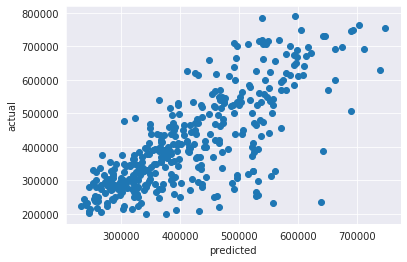

In [0]:
rf_pred = fitted_models['rf'].predict(X_test)
plt.scatter(rf_pred, y_test)
plt.xlabel('predicted')
plt.ylabel('actual')
plt.show()

In [0]:
type(fitted_models['rf'])

sklearn.model_selection._search.GridSearchCV

In [0]:
type(fitted_models['rf'].best_estimator_)

sklearn.pipeline.Pipeline

In [0]:
fitted_models['rf'].best_estimator_

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('randomforestregressor',
                 RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                       criterion='mse', max_depth=None,
                                       max_features='auto', max_leaf_nodes=None,
                                       max_samples=None,
                                       min_impurity_decrease=0.0,
                                       min_impurity_split=None,
                                       min_samples_leaf=1, min_samples_split=2,
                                       min_weight_fraction_leaf=0.0,
                                       n_estimators=200, n_jobs=None,
                                       oob_score=False, random_state=123,
                                       verbose=0, warm_start=False))],
         verbose=False)

In [0]:
#saving model with pickle

with open('final_model.pkl', 'wb') as f:
    pickle.dump(fitted_models['rf'].best_estimator_, f)